In [1]:
import seaborn as sns #visualization library
import matplotlib.pyplot as plt #base visualization library
import pandas

# Visualization!

See more on choosing [Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

The goal: visualize the average MLS salary over time and by main MLS positions.

The process: change one thing at a time until you get a visualization you like!

In [2]:
# Read in our MLS data
# Note what columns are available

df = pandas.read_csv("../data/MLS_salary_data.csv", sep = ',', encoding = 'utf-8', index_col = 0)
df.head()

,Club,LastName,FirstName,Position,BaseSalary,GuaranteedCompensation,Year
0,CHI,Armas,Chris,M,225000.0,225000.0,2007
1,CHI,Banner,Michael,M,12900.0,12900.0,2007
2,CHI,Barrett,Chad,F,41212.5,48712.5,2007
3,CHI,Blanco,Cuauhtemoc,F,2490000.0,2670000.0,2007
4,CHI,Brown,C.J.,D,106391.0,106391.0,2007


In [3]:
#create average score by year

grouped_year = df.groupby('Year')
grouped_year.head()

,Club,LastName,FirstName,Position,BaseSalary,GuaranteedCompensation,Year
0,CHI,Armas,Chris,M,225000.0,225000.00,2007
1,CHI,Banner,Michael,M,12900.0,12900.00,2007
2,CHI,Barrett,Chad,F,41212.5,48712.50,2007
3,CHI,Blanco,Cuauhtemoc,F,2490000.0,2670000.00,2007
4,CHI,Brown,C.J.,D,106391.0,106391.00,2007
371,LA,Adzemian,Vardan,D,12900.0,12900.00,2008
372,LA,Alamo,Charles,GK,12900.0,12900.00,2008
373,NE,Albright,Chris,D,160000.0,160000.00,2008
374,HOU,Alcaraz,Johnny,M,12900.0,12900.00,2008
375,LA,Allen,Ely,F,12900.0,12900.00,2008


The basic syntax for Seaborn is the name of the plot as the function, with input including the variable on the x-axis, the variable on the y-axis, and the name of the dataframe. We'll see below an option use of hue, to visualize categorical differences.

<AxesSubplot:xlabel='Year', ylabel='BaseSalary'>

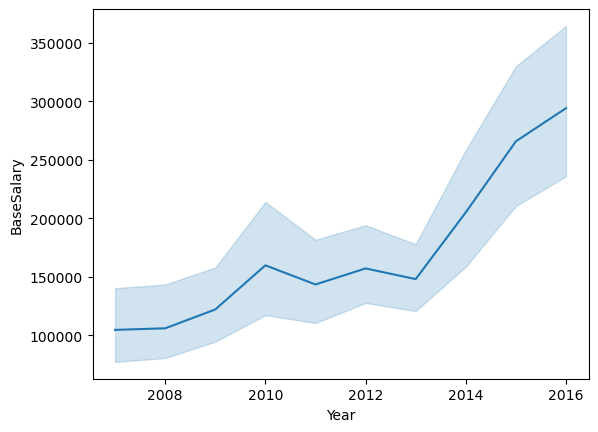

In [4]:
#Note the basic synax
sns.lineplot(x = 'Year', y = 'BaseSalary', data=df)

In [5]:
#Let's bring in one of our categorical variables to make this more interesting:
df['Position'].value_counts()

M      1603
D      1356
F      1050
GK      525
M-F     112
D-M      64
M-D      60
F-M      37
M/F      20
M/D      10
D/M       8
MF        7
D/F       4
F/M       4
F-D       1
D-F       1
Name: Position, dtype: int64

In [6]:
#visualize the top four positions only (to make the visualization simpler)

df_positions = df[df['Position'].isin(['M', 'D', 'F', 'GK'])]
df_positions['Position'].value_counts()
df_positions

,Club,LastName,FirstName,Position,BaseSalary,GuaranteedCompensation,Year
0,CHI,Armas,Chris,M,225000.0,225000.0,2007
1,CHI,Banner,Michael,M,12900.0,12900.0,2007
2,CHI,Barrett,Chad,F,41212.5,48712.5,2007
3,CHI,Blanco,Cuauhtemoc,F,2490000.0,2670000.0,2007
4,CHI,Brown,C.J.,D,106391.0,106391.0,2007
...,...,...,...,...,...,...,...
4926,VAN,Smith,Jordan,D,115000.0,122743.0,2016
4927,VAN,Techera,Cristian,M,320000.0,345000.0,2016
4928,VAN,Teibert,Russell,M,115000.0,182500.0,2016
4929,VAN,Tornaghi,Paolo,GK,62500.0,62500.0,2016


<AxesSubplot:xlabel='Year', ylabel='BaseSalary'>

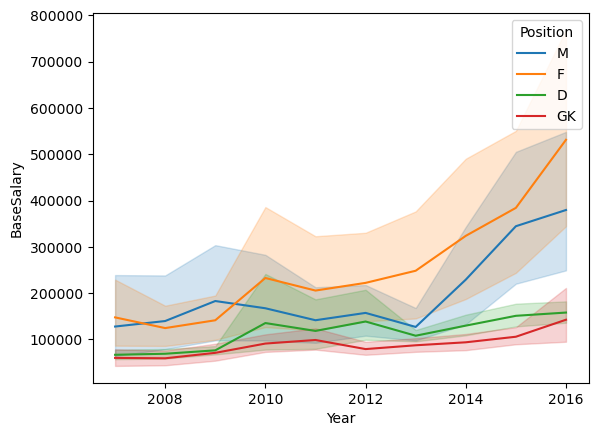

In [7]:
#graph it, using the 'hue' option to separate by genre
sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

<AxesSubplot:xlabel='Year', ylabel='BaseSalary'>

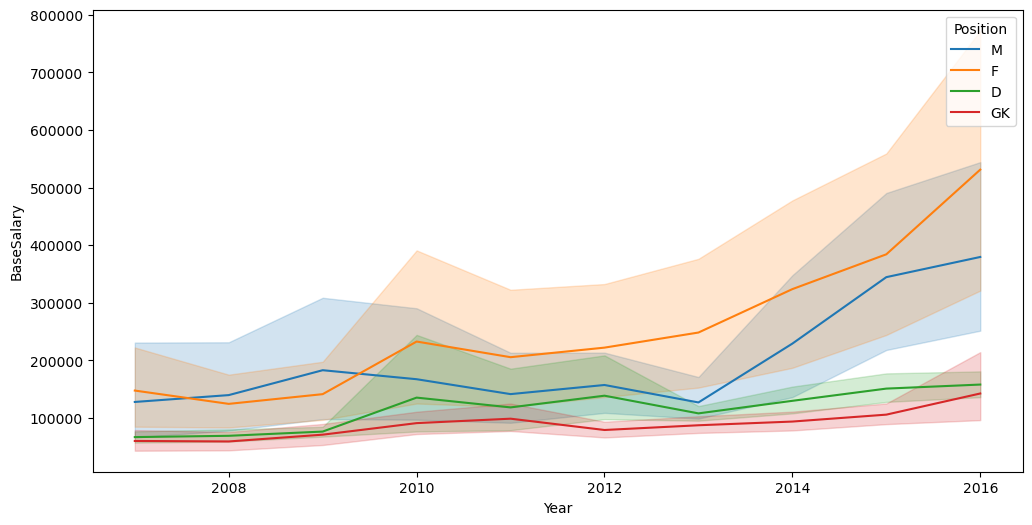

In [53]:
#Pretty ugly.
#let's make this prettier, one step at a time
#First, make it a different size, so it's not so squished

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)


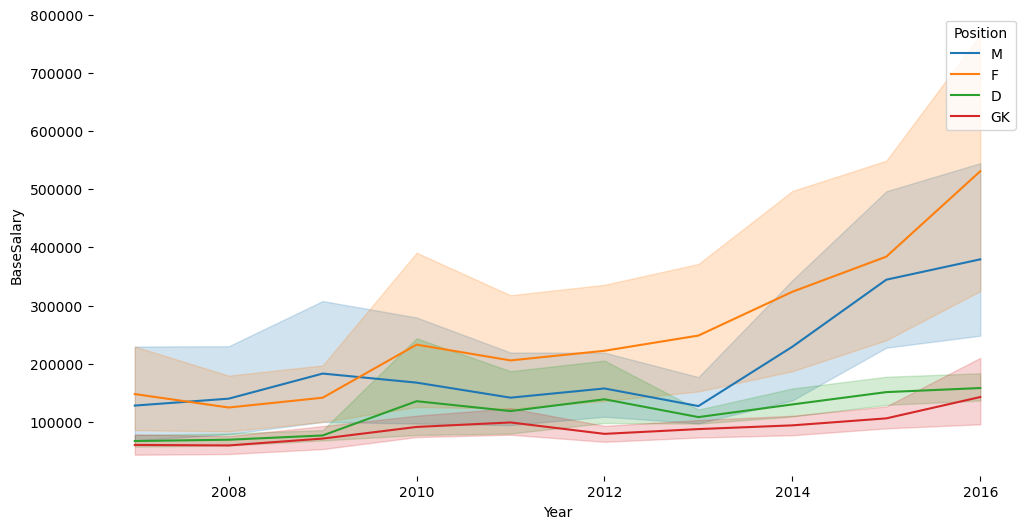

In [10]:
#Next, remove all the spines - they're chart junk

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)



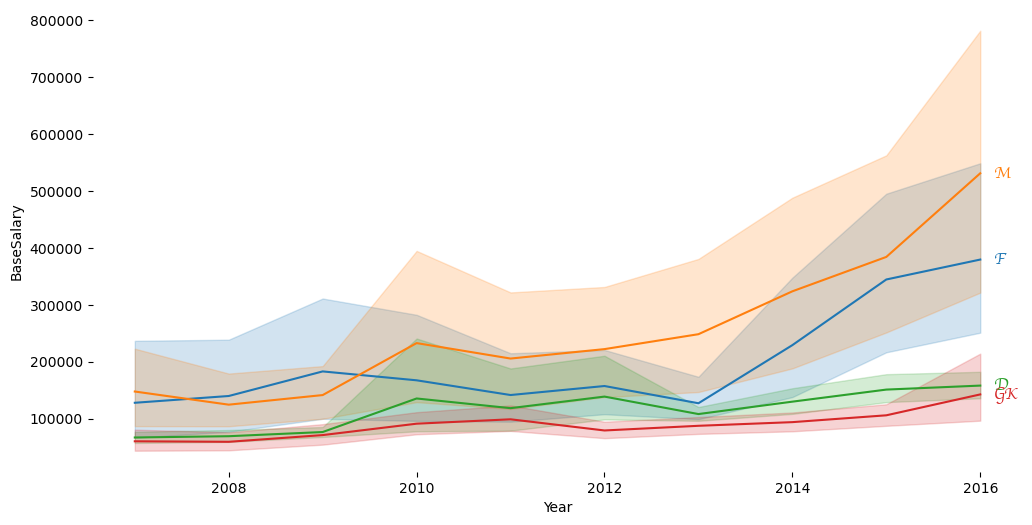

In [58]:
#let's label the line rather than have a legend

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=12, 
                va="center", 
                family='cursive')

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

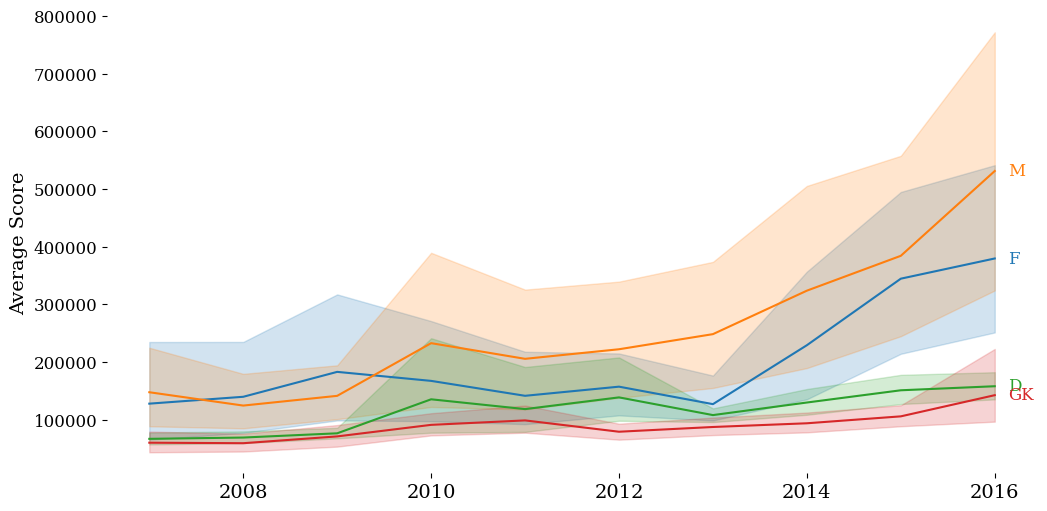

In [59]:
#remove more chart junk and change fonts, etc.

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=12, 
                va="center", 
                family='serif')

        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Average Score', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis



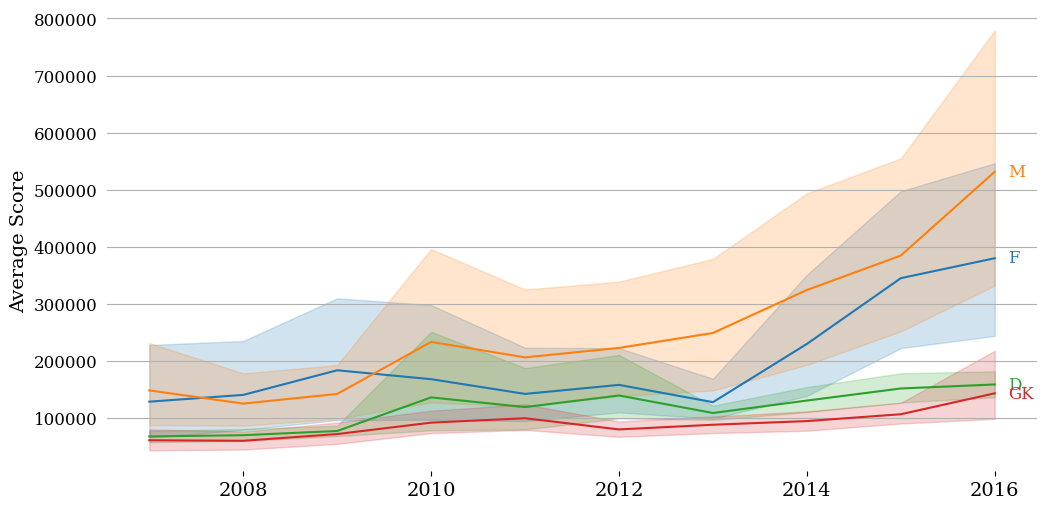

In [60]:
# creat an unobstrusive grid

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=12, 
                va="center", 
                family='serif')

        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Average Score', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis


#add y-axis grid lines
ax.yaxis.grid()

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

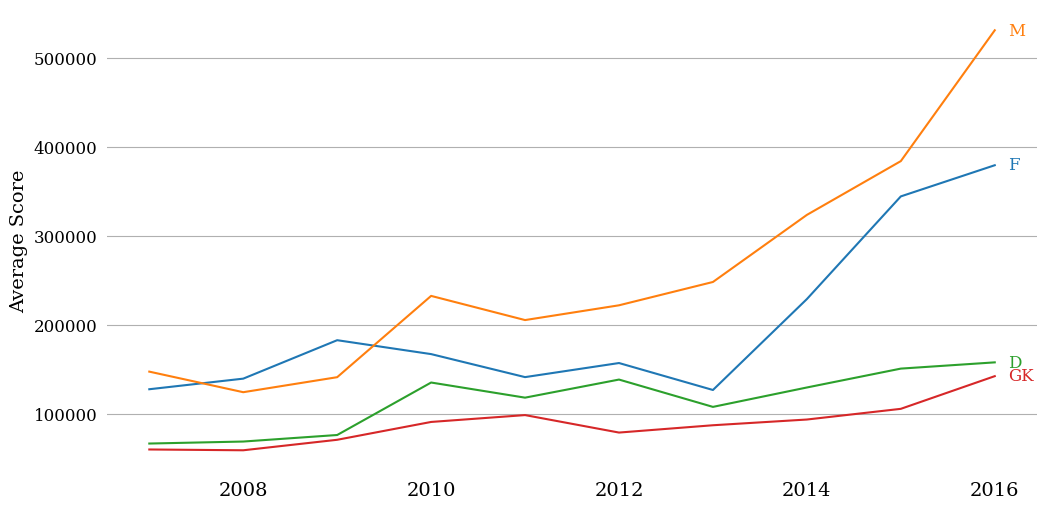

In [62]:
# maybe remove confidence intervals?

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions, ci=None) #remove confidence intervals

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=12, 
                va="center", 
                family='serif')

        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Average Score', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis


#add y-axis grid lines
ax.yaxis.grid()

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

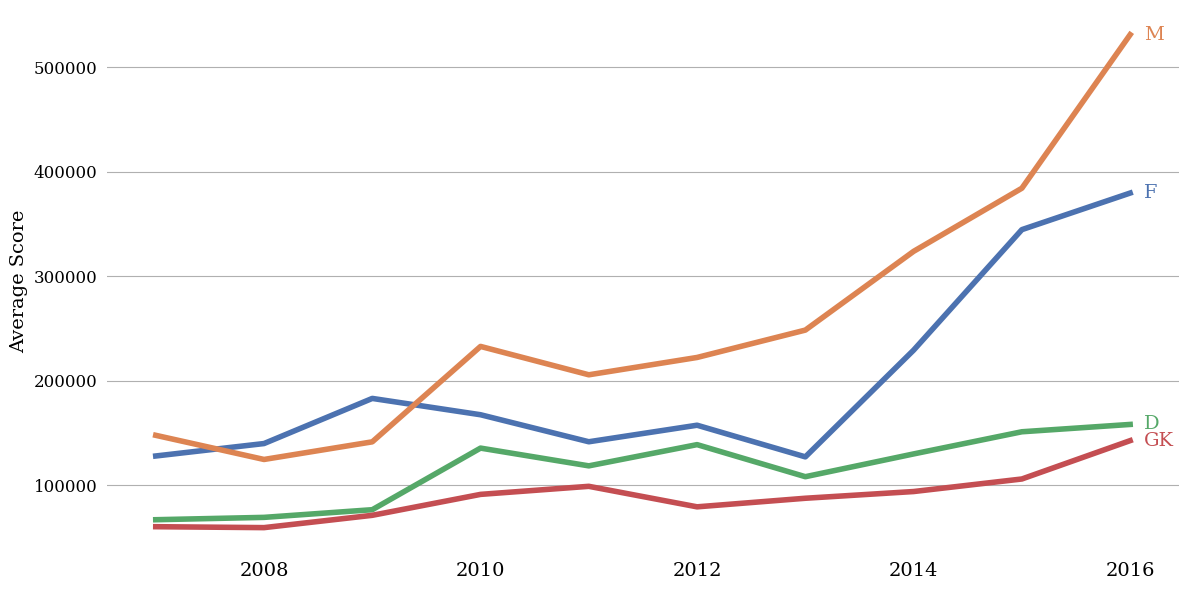

In [21]:
# choose a prettier palette? make the lines bigger?

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions, 
             ci=None, 
             palette=sns.color_palette("deep")[:4], #choose palette
             linewidth=4
            ) 

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=14, 
                va="center", 
                family='serif')

        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Average Score', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis


#add y-axis grid lines
ax.yaxis.grid()

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient

<AxesSubplot:xlabel='Year', ylabel='BaseSalary'>

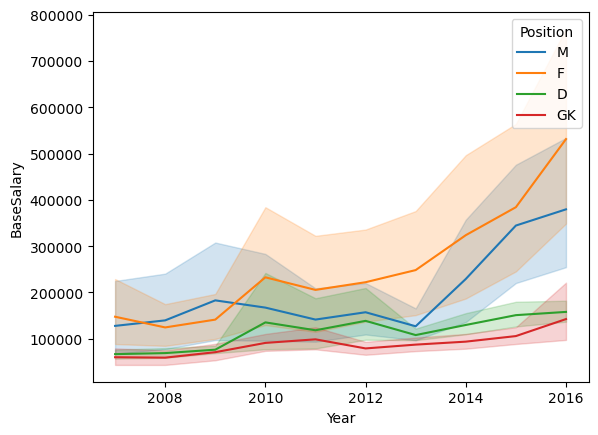

In [63]:
#compare to default
sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions)

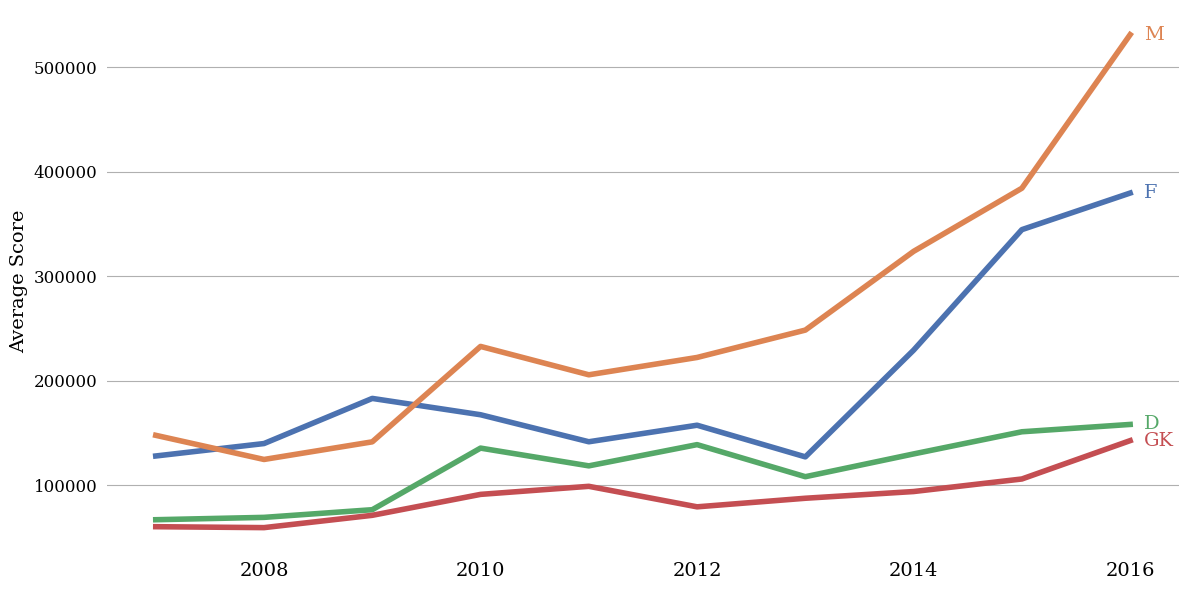

In [23]:
# let's save it!

#create objects to manipulate
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', data=df_positions, 
             ci=None, 
             palette=sns.color_palette("deep")[:4], #choose palette
             linewidth=4
            ) 

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=14, 
                va="center", 
                family='serif')

        
plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Average Score', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis


#add y-axis grid lines
ax.yaxis.grid()

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient
plt.savefig('../figures/mls_positions_temporal.pdf', bbox_inches = "tight")

## Some other (default) visualizations

In [24]:
#let's return to our education data

df_edu = pandas.read_csv('../data/education_dataset.csv', encoding = 'utf-8')
df_edu.head()

,reading_score,math_score,knowledge_score,p2income,incomecat
0,36.58,39.54,33.822,140000.0,3
1,50.82,44.44,38.147,120000.0,3
2,40.68,28.57,28.108,90000.0,3
3,32.57,23.57,15.404,50000.0,2
4,31.98,19.65,18.727,55000.0,2


<AxesSubplot:xlabel='incomecat', ylabel='knowledge_score'>

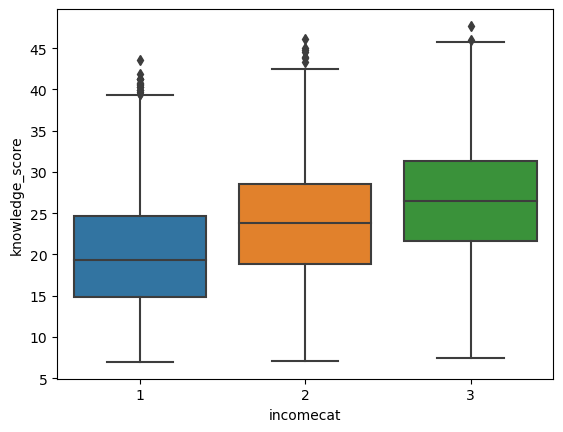

In [64]:
#Boxplot
sns.boxplot(x = 'incomecat', y = 'knowledge_score', data = df_edu)

<AxesSubplot:xlabel='incomecat', ylabel='knowledge_score'>

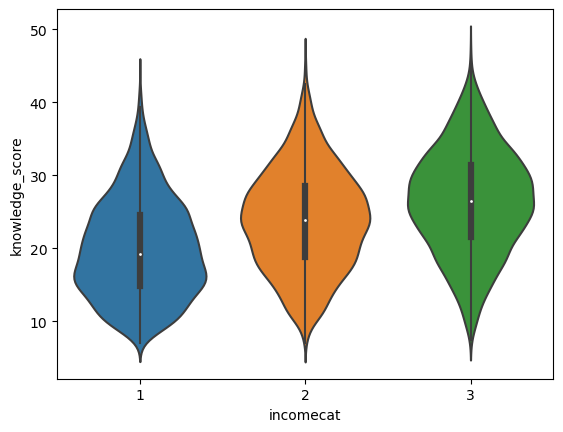

In [26]:
#Violin plot (shows more of the distribution)
sns.violinplot(x = 'incomecat', y = 'knowledge_score', data = df_edu)

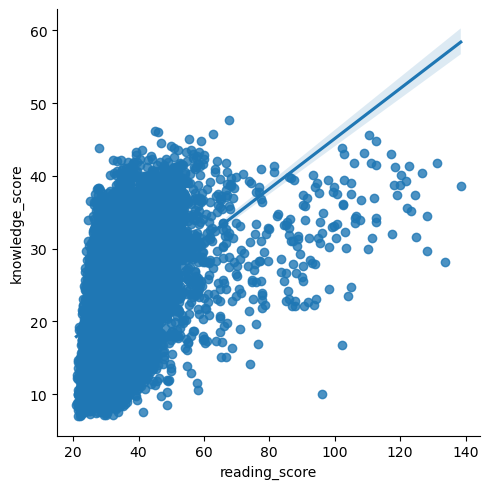

In [27]:
#plot a regression line
sns.lmplot(x = 'reading_score', y = 'knowledge_score', data = df_edu)

<AxesSubplot:xlabel='reading_score', ylabel='knowledge_score'>

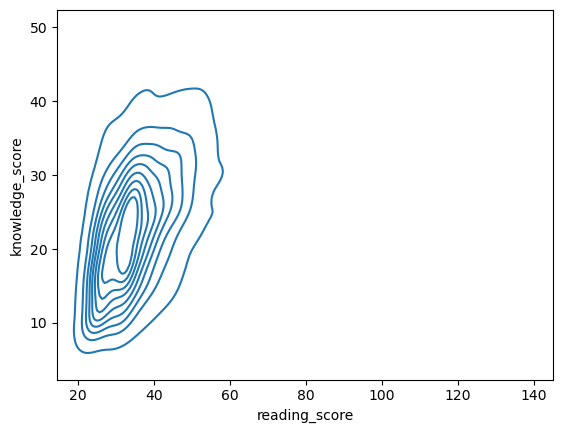

In [73]:
#density plot
sns.kdeplot(x = 'reading_score', y = 'knowledge_score', data = df_edu)

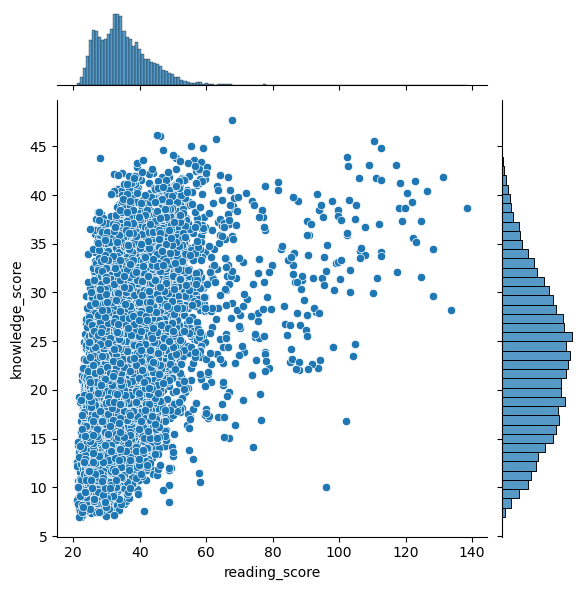

In [69]:
#Oooh look at this one!

sns.jointplot(x = 'reading_score', y = 'knowledge_score', data = df_edu)

# Sandbox Time!

Data visualization is so personalized. Take some time to play around. Possible options:

* Choose your favorite visualize above and start changing things: color, font style, font size. Add more grid lines, remove all grid lines. Change the line width, add markers to the lines, etc. Set the background as black, or gray. Just get a sense for what you can do, and what you like best. 
* Take this time to play around with your own data or another dataset we have used in class. What can you visualize? 

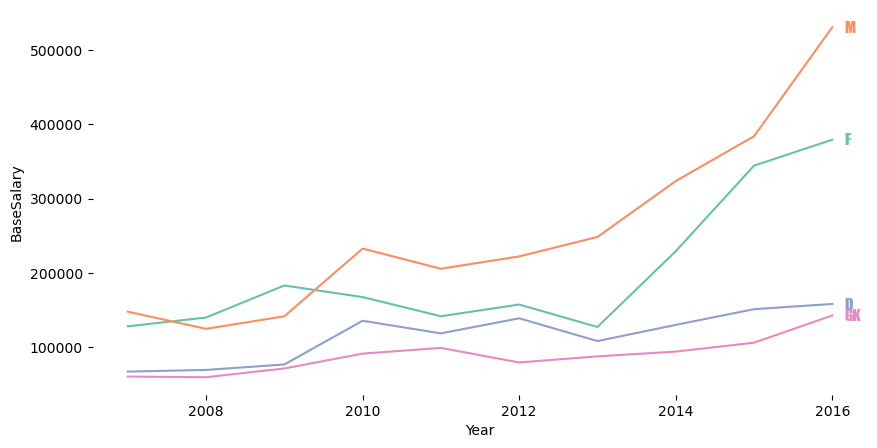

In [52]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x='Year', y='BaseSalary', hue='Position', palette=sns.color_palette("Set2")[:4], data=df_positions, ci=None)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#remove legend
ax.legend().set_visible(False)

#label the lines
for line, name in zip(ax.lines, ['F', 'M', 'D', 'GK']):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(0.96,y), xytext=(6,0), 
                color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(),
                textcoords="offset points",
                size=11, 
                va="center", 
                family='fantasy')